In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('census_income/adult.data')

# Column names are missing from the CSV
# See `census_income/adult.names` for the column names
df.columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income',
]
# Convert categorical features
df['workclass'] = df['workclass'].astype('category')
df['marital-status'] = df['marital-status'].astype('category')
df['occupation'] = df['occupation'].astype('category')
df['relationship'] = df['relationship'].astype('category')
df['race'] = df['race'].astype('category')
df['sex'] = df['sex'].astype('category')
df['native-country'] = df['native-country'].astype('category')
df['income'] = df['income'].astype('category')
print(df)

       age          workclass  fnlwgt    education  education-num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divor

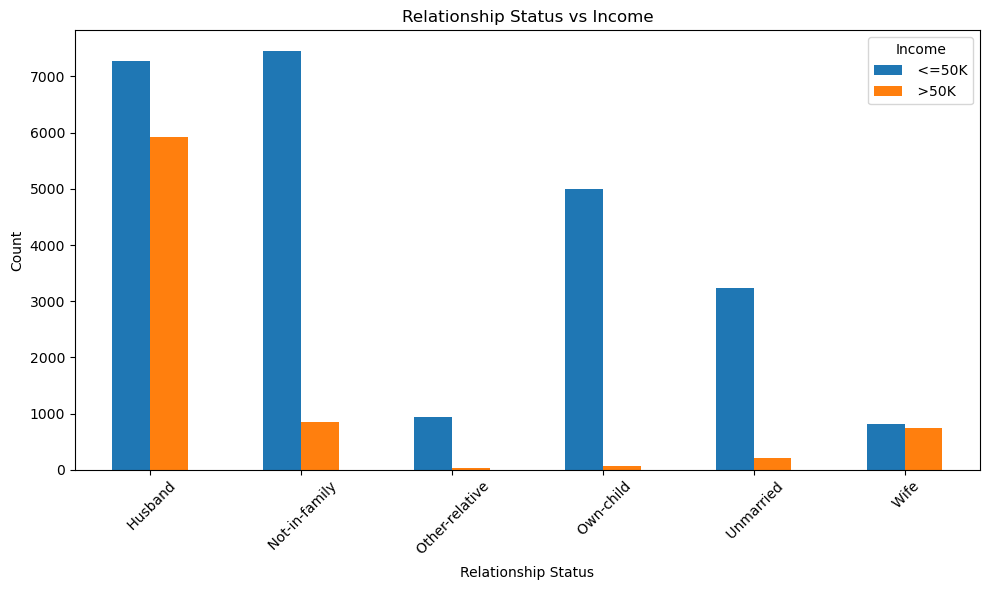

In [13]:
relationship_income_count = df.groupby(['relationship', 'income'], observed=True).size().unstack(fill_value=0)

relationship_income_count.plot(kind='bar', figsize=(10, 6))
plt.title('Relationship Status vs Income')
plt.xlabel('Relationship Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.tight_layout()

plt.show()

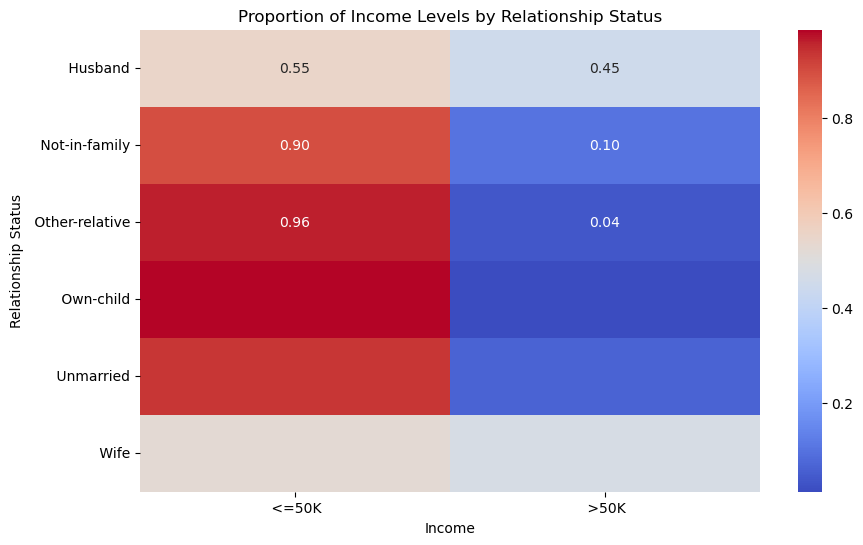

In [21]:
contingency_table = pd.crosstab(df['relationship'], df['income'])

contingency_table_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table_normalized, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Proportion of Income Levels by Relationship Status')
plt.xlabel('Income')
plt.ylabel('Relationship Status')

plt.show()


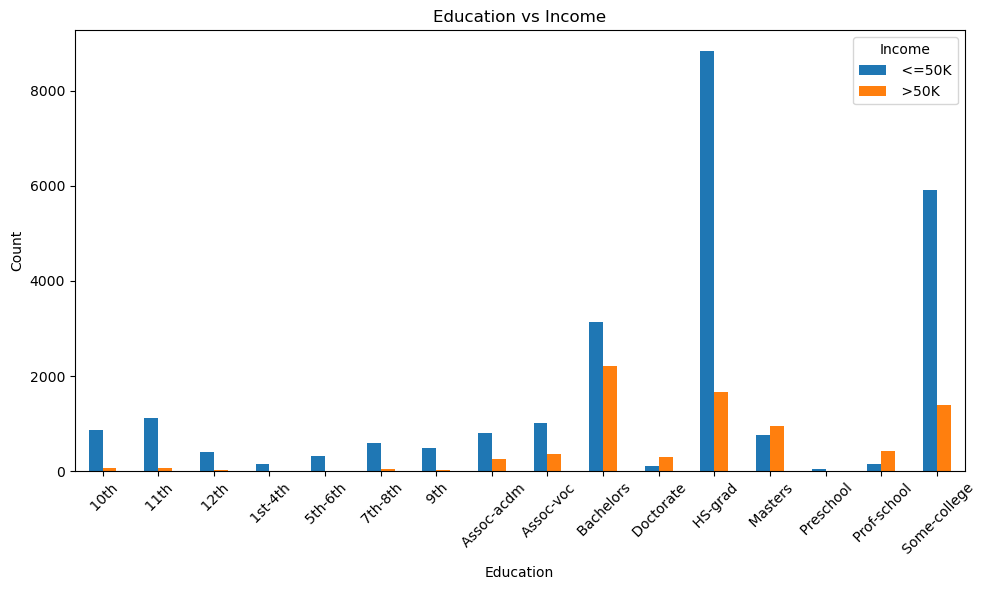

In [12]:
education_income_count = df.groupby(['education', 'income'], observed=True).size().unstack(fill_value=0)

education_income_count.plot(kind='bar', figsize=(10, 6))
plt.title('Education vs Income')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.tight_layout()

plt.show()

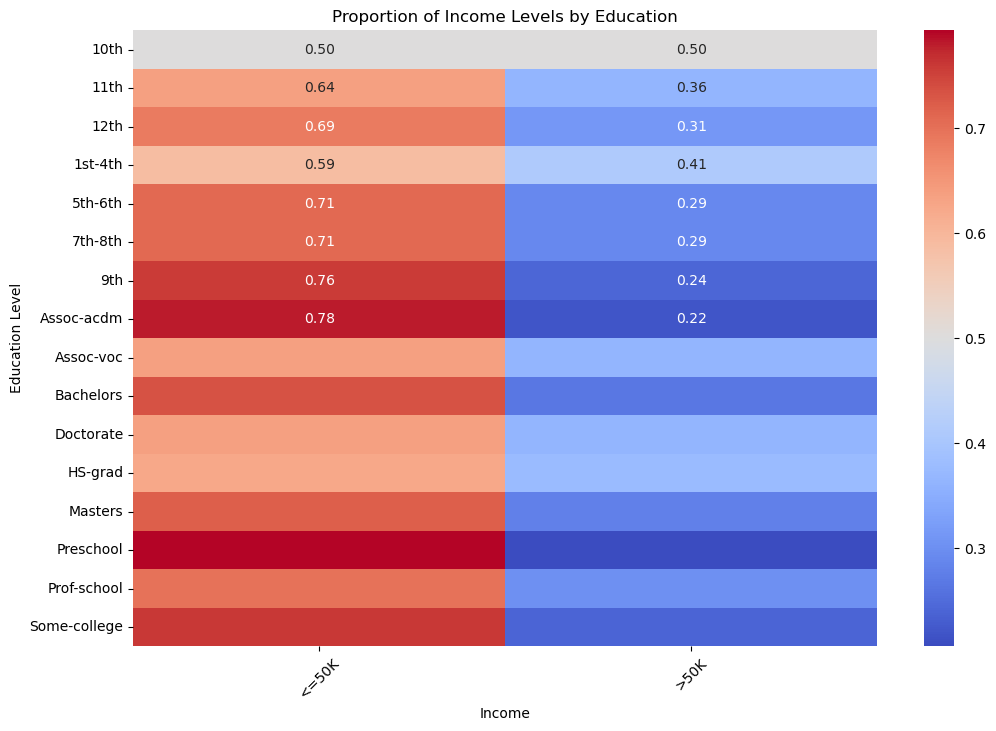

In [27]:

contingency_table = pd.crosstab(df['education'], df['income'])

contingency_table_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0)

plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table_normalized, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Proportion of Income Levels by Education')
plt.xlabel('Income')
plt.ylabel('Education Level')
plt.xticks(rotation=45)
plt.show()


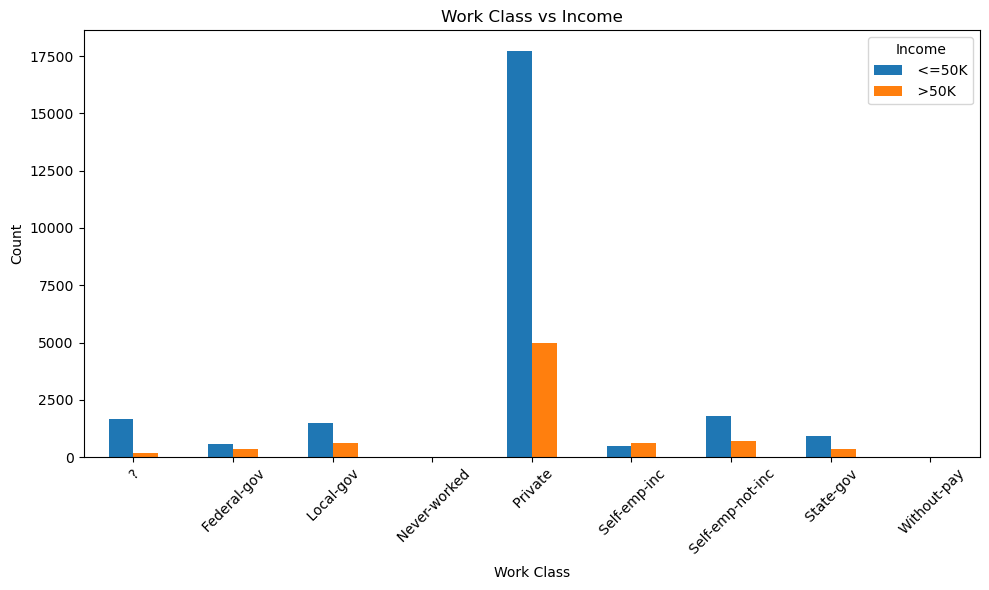

In [20]:
workclass_income_count = df.groupby(['workclass', 'income'], observed=True).size().unstack(fill_value=0)

workclass_income_count.plot(kind='bar', figsize=(10, 6))
plt.title('Work Class vs Income')
plt.xlabel('Work Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.tight_layout()

plt.show()

C:\Users\Jerome\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


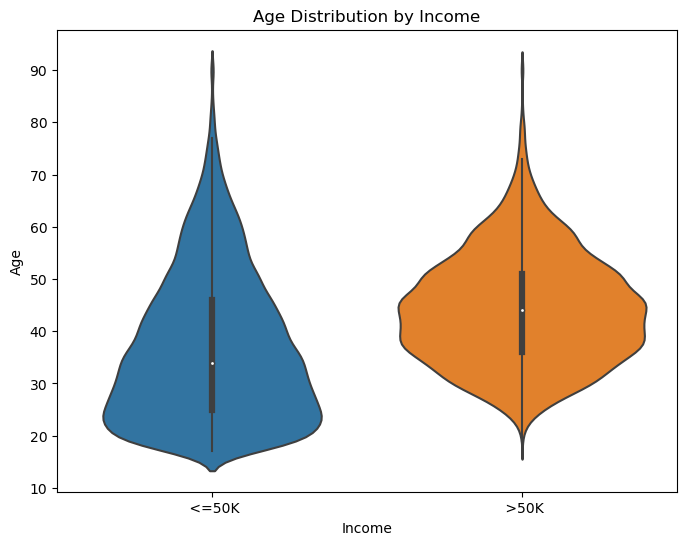

In [19]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='income', y='age', data=df)
plt.title('Age Distribution by Income')
plt.xlabel('Income')
plt.ylabel('Age')

plt.show()
